# Neural & Behavioral Modeling - Week 1 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
from numpy import *
import sympy as sym
from sympy.solvers import solve
import pandas as pd

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex.

### 1.1 Insert your codes to complete the simulation (2 points)

Reach equilibrium after 13 iterations.


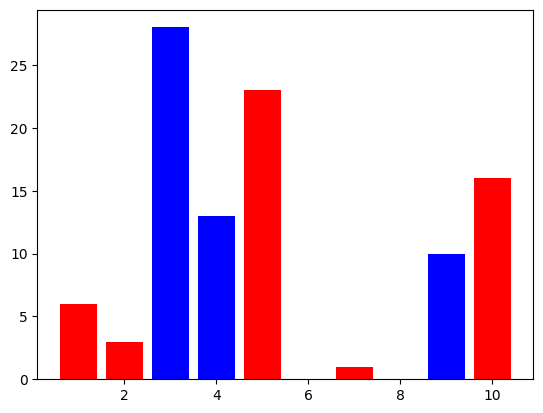

In [2]:
# Model parameters:
Ngroups=10
Npeople=100
Tolerance=.30 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?    
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people: list) -> tuple: # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1)) 
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy = 0 # Number of happy people

# Simulation:
iterations_count = 0 # iteration counter
while(Nhappy < Npeople): # Simulation stops when everyone is happy
    iterations_count += 1 # count iterations
    Nhappy = 0 # recounting after a new move
    
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    
    # Check every person
    for person in people:    
        # Leave if proportion of opposite_sex is large than Tolerance
        opposite_sex = abs(person.sex-1)
        if proportions[person.group, opposite_sex] > Tolerance:
            person.leave()
        else:
            Nhappy+=1
            
    # Plot new results:
    plot_party(counts)

print(f"Reach equilibrium after {iterations_count} iterations.")
    

In [3]:
# Simulation:
def Single_party(Ngroups, Npeople, Tolerance, Max_iterations=100):
    people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
    Nhappy = 0
    iterations_count = 0 # iteration counter
    while(Nhappy < Npeople): # Simulation stops when everyone is happy
    
        Nhappy = 0 # recounting after a new move
        counts, proportions=party_stats(people) # size=group*sex
        # Check every person
        for person in people:    
            # Leave if proportion of opposite_sex is large than Tolerance
            opposite_sex = abs(person.sex-1)
            if proportions[person.group, opposite_sex] > Tolerance:
                person.leave()
            else:
                Nhappy+=1
        
        # Break if the while loop reach maximum num of iterations
        iterations_count += 1 # count iterations
        if iterations_count > Max_iterations:
            break
            
    # Check how many group is polarized.
    non_polarized_group = 0
    for group in proportions:
        if group[0]>0 and group[1]>0:
            non_polarized_group += 1
    polarized_ratio = 1 - non_polarized_group/Ngroups
           
    return {'N_iterations':iterations_count, 'Polarized_ratio': polarized_ratio}

def Simulation(Nparty, Ngroups, Npeople, Tolerance):
    results_df = pd.DataFrame()
    for i in range(Nparty):
        result = [Single_party(Ngroups, Npeople, Tolerance)]
        results_df = pd.concat([results_df, pd.DataFrame(result)])
    return results_df

def plot_results(N_range, title, mean_iteration_list, mean_polarized_list, main_title=None):
    fig, axes = subplots(1, 2, figsize = (6,3))
    axes[0].plot(N_range, mean_iteration_list, '-o')
    axes[0].set_xlabel(title)
    axes[0].set_ylabel("Average Number of Iterations")

    axes[1].plot(N_range, mean_polarized_list, '-ro')
    axes[1].set_xlabel(title)
    axes[1].set_ylabel("Average Polarized Ratio")

    fig.suptitle(main_title)
    fig.tight_layout()
    

### 1.2 Modify the three model parameters & discuss how each affects your simulations (2 points)

#### 1.2.1 Manipulate Number of People

In [4]:
Npeople_range = arange(50, 501, 50)
mean_iteration_list_1 = []
mean_polarized_list_1 = []
for p in Npeople_range:
    results_df = Simulation(100, 10, p, 0.3) 
    mean_iteration_list_1.append(results_df.N_iterations.mean())
    mean_polarized_list_1.append(results_df.Polarized_ratio.mean())

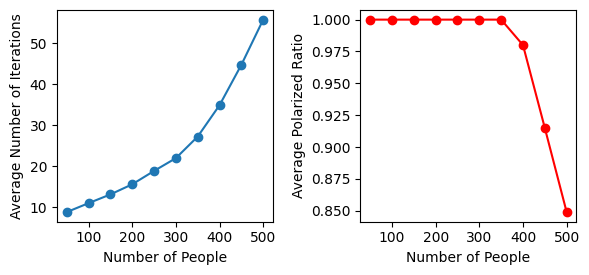

In [5]:
plot_results(Npeople_range, 'Number of People', mean_iteration_list_1, mean_polarized_list_1)

This simulation manipulated the number of people in a party with **Ngroups = 10** and **tolerance = 0.3**. Each condition has run 100 times. Average iteration times and average polarized ratio were used as indices for each condition. The polarized ratio is defined as the ratio of polarzied groups and empty group in a party.

The figure above shows the average number of iterations and the average polarized ratio across different number of people.  
In the figure, we can see that
1. As number of people increases, the average number of iterations also increases.
2. The average polarized ratio decreases while the number people increase. This might due to the maximum number of iterations set in the simulation.

In this situation, the number of people affect the number of iterations for all groups in a single party to get polarized.

#### 1.2.2 Manipulate Number of Groups

In [6]:
Ngroup_range = arange(10, 101, 2)
mean_iteration_list_2 = []
mean_polarized_list_2 = []
for g in Ngroup_range:
    results_df = Simulation(100, g, 200, 0.3) 
    mean_iteration_list_2.append(results_df.N_iterations.mean())
    mean_polarized_list_2.append(results_df.Polarized_ratio.mean())

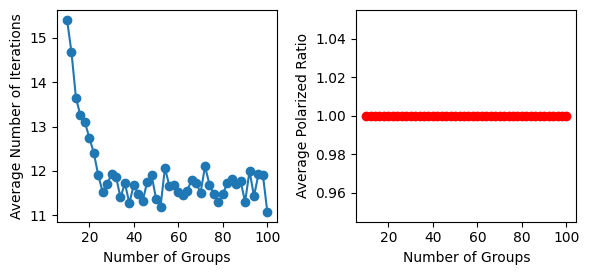

In [7]:
plot_results(Ngroup_range, 'Number of Groups',mean_iteration_list_2, mean_polarized_list_2)

This simulation manipulated the number of groups in a party, while **the number of people and tolerance are fixed at 200 and 0.3 respectively**.

The figure above shows the average number of iterations and the average polarized ratio across different number of people.  
In the figure, we can see that
1. As the number of groups increases, the average number of iterations decreases.
2. Every group in 100 parties polarized regardless of the number of groups.

#### 1.2.3 Manipulate Tolerance

In [8]:
Tolerance_range = arange(0.1, 1.1, 0.1)
mean_iteration_list_3 = []
mean_polarized_list_3 = []
for t in Tolerance_range:
    results_df = Simulation(100, 10, 100, t) 
    mean_iteration_list_3.append(results_df.N_iterations.mean())
    mean_polarized_list_3.append(results_df.Polarized_ratio.mean())

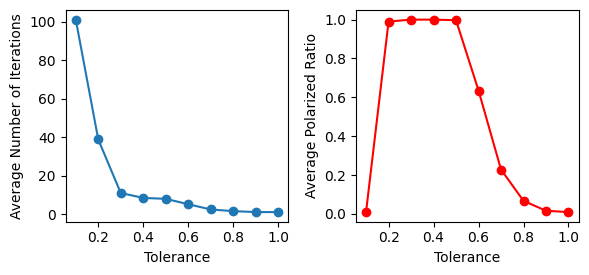

In [9]:
plot_results(Tolerance_range, 'Tolerance', mean_iteration_list_3, mean_polarized_list_3)

This simulation manipulated the tolerance of every person in a party, while **the number of people and number of groups are fixed at 100 and 10 respectively**.

The figure above shows that
1. When the tolerance is sufficiently low, the party reached iteration limit before it polarized.
2. As the tolerance increases, the number of iterations decreases.
3. The average polarized ratio maintain at 1.0 when tolerance fall between 0.2 and 0.5.
4. The average polarized ratio decreases after the tolerance exceeds 0.50.


#### 1.2.4 Manipulate number of people when tolerance > 0.5

In [10]:
Npeople_range = arange(20, 201, 5)
mean_iteration_list_4 = []
mean_polarized_list_4 = []
for p in Npeople_range:
    results_df = Simulation(100, 10, p, 0.7) 
    mean_iteration_list_4.append(results_df.N_iterations.mean())
    mean_polarized_list_4.append(results_df.Polarized_ratio.mean())

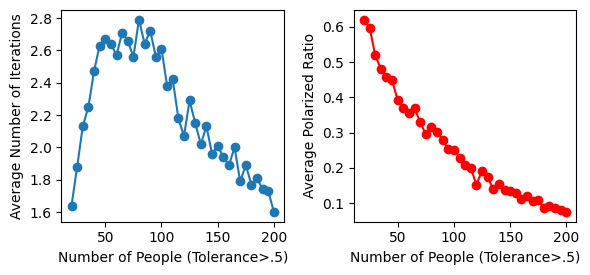

In [11]:
plot_results(Npeople_range, 'Number of People (Tolerance>.5)', mean_iteration_list_4, mean_polarized_list_4)

In this simulation, the number of groups is fixes at 10 and tolerance is fixed at 0.7.
The figrue above shows that when the number of people increase, the number of iterations present a inverted-U shape, and the average polarized ratio decreases as the number of people increases. When there are many people in a party, the ratio of opposite sex in a group is less likely to exceeds the tolerance.

#### 1.2.5 Manipulate number of groups when tolerance > 0.5

In [12]:
Ngroup_range = arange(10, 151, 2)
mean_iteration_list_5 = []
mean_polarized_list_5 = []
for g in Ngroup_range:
    results_df = Simulation(100, g, 200, 0.7) 
    mean_iteration_list_5.append(results_df.N_iterations.mean())
    mean_polarized_list_5.append(results_df.Polarized_ratio.mean())

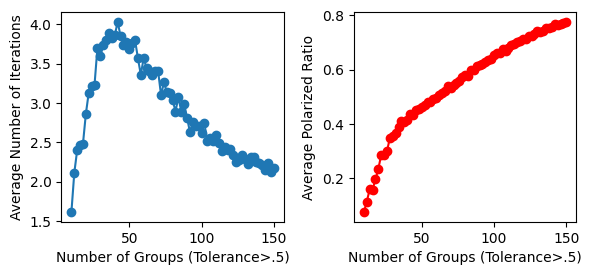

In [13]:
plot_results(Ngroup_range, 'Number of Groups (Tolerance>.5)', mean_iteration_list_5, mean_polarized_list_5)

In this simulation, the number of people is fixed at 200 and tolerance is fixed at .7.
The figrue above shows that when the number of groups increase, the number of iteration present a inverted-U shape, and the average polaried ratio increase as the number of groups increases.
When there are many groups in a party, they are more likely to exceed tolerance because there are fewer people in one group.

#### 1.2.6 Fix People-Group Ratio
According to 1.2.4 and 1.2.5, it seems that when tolerance is greater than .5, the average polarized ratio is influence by the People-Group Ratio.

In [14]:
def manipulate_PG_ratio(ratio):
    NPeople_range = np.arange(72, 721, 18, dtype=int)
    NGroup_list = []
    for n in NPeople_range:
        NGroup_list.append(n/ratio)

    mean_iteration_list_6 = []
    mean_polarized_list_6 = []
    for i in range(len(NGroup_list)):
        g = NGroup_list[i]
        p = NPeople_range[i]
        results_df = Simulation(100, g, p, 0.7) 
        mean_iteration_list_6.append(results_df.N_iterations.mean())
        mean_polarized_list_6.append(results_df.Polarized_ratio.mean())
    

    plot_results(NPeople_range, 'Npeople'
             , mean_iteration_list_6, mean_polarized_list_6, main_title = f'People/Group ratio={ratio}')

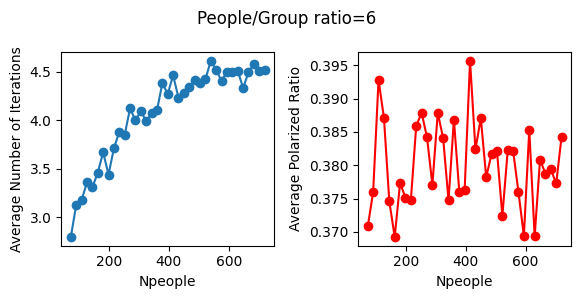

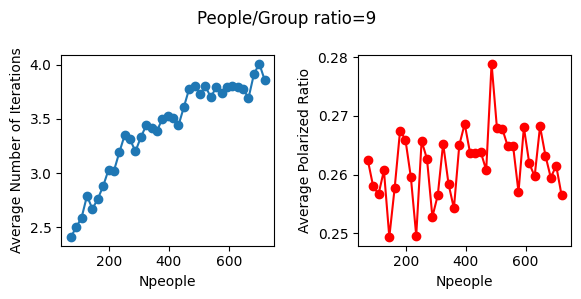

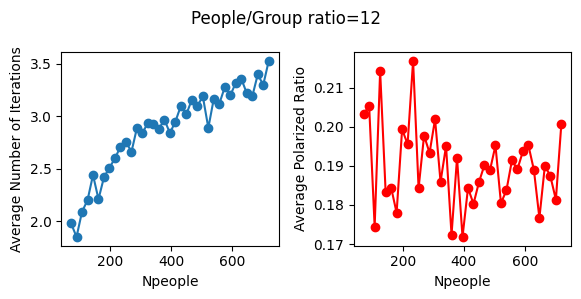

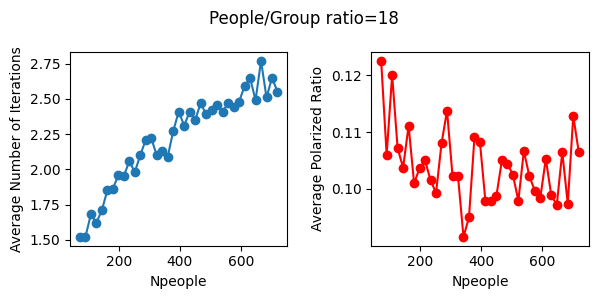

In [15]:
for i in [6,9,12,18]:
    manipulate_PG_ratio(i)

The figures above shows the iteration number and the average polarized ratio across different people-group ratio.
In the figures we can see that the average polarized rates are determined by the people/group ratio. If the people/group ratio is larger, the averge polarized ratio is lower.

### 1.3 Discuss why the simulation leads to group polarization (1 point)

When the tolerance is less than .5, people will leave until the ratio of the opposite sex in a group is less than tolerance. If a person's sex is the minority in a group, he/she will leave the group until he/she find a group where his/her sex is the majority of the group. This leads to group polarization. When the tolerance is higher than .5, it is possible for people to stay even they are the minority in a group, so that people with different sex can be in the same group.

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

$$
\begin{align}
\frac{dy}{dt} &= -Ay+\left(B-y\right)E-\left(y-C\right)I = 0\\
\Rightarrow \quad y &= \frac{BE+CI}{A+E+I}
\end{align}
$$

### 2.1.1 Symbolically find $y(t)$

In [16]:
A,B,C,D,E,I,t,C1,y0 = sym.symbols('A,B,C,D,E,I,t,C1,y0')
y = sym.Function('y')(t)
sol = sym.dsolve(y.diff()+A*y-(B-y)*E+(y-C)*I)
C2 = solve(sol.subs({t:0, y:y0}),C1)[0]
sol.subs({C1:C2})

Eq(y(t), B*E/(A + E + I) + C*I/(A + E + I) + (A*y0 - B*E - C*I + E*y0 + I*y0)*exp(-t*(A + E + I))/(A + E + I))

After arrangement

$$y(t) = \left(y_0-\frac{BE+CI}{A+E+I}\right)e^{-\left(A+E+I\right) t}+\frac{BE+CI}{A+E+I}$$

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)

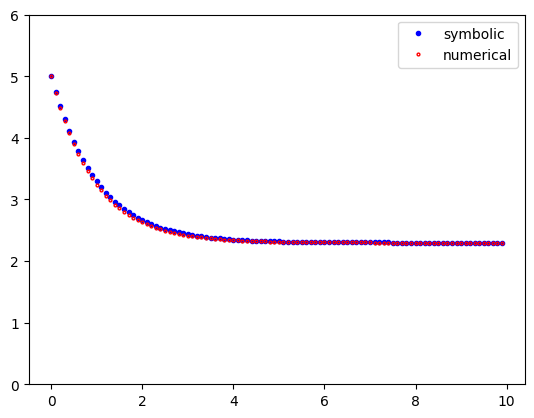

In [17]:
# Write your simulation codes here
dt = 0.1 # step size
y=[5] # arbitrary initial value
A=0.1; B=2; C=3; E=0.4; I=0.5 # arbitrary parameters
t=arange(0,10,dt) # timepoint sequence

# iteratively obtain values
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*(-A*y1+(B-y1)*E-(y1-C)*I) # Euler integration
    y.append(y2)
    
plot(t, (y[0]-(B*E+C*I)/(A+E+I))*np.exp(-(A+E+I)*t)+(B*E+C*I)/(A+E+I),'b.'); # true answer
plot(t,y[0:-1],'ro',markerfacecolor='None', markersize = 2) # approximation
ylim(0,6)
legend(['symbolic','numerical']);

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

### 2.3.1 Symbolically find $y(t)$

In [18]:
# for t < 5
E,t,C1,y0 = sym.symbols('E,t,C1,y0')
y = sym.Function('y')(t)
sol = sym.dsolve(y.diff()+y-E)
sol_lt5 = sol.subs({E:1, t:0, y:0})
C2 = solve(sol_lt5, C1)[0]
eq_lt5 = sol.subs({C1:C2, E:1})
eq_lt5

Eq(y(t), 1 - exp(-t))

In [19]:
y5 = eq_lt5.subs({t:5})
y5

Eq(y(5), 1 - exp(-5))

In [20]:
# for t > 5
E,t,C1,y0 = sym.symbols('E,t,C1,y5')
y = sym.Function('y')(t)
sol = sym.dsolve(y.diff()+y-E)
sol_gt5 = sol.subs({E:0, t:5, y:y5.rhs})
C2 = solve(sol_gt5, C1)[0]
eq_gt5 = sol.subs({C1:C2, E:0})
eq_gt5

Eq(y(t), (-1 + exp(5))*exp(-t))

$$\begin{align}
y(t)= 
\begin{cases}
    1 - e^{-t}, & t \lt 5\\
\left(-1+e^5\right)e^{-t}, & t \gt 5
\end{cases}
 \quad \forall t \in [0,10],\quad y(0) = 0.
\end{align}$$

### Euler Integration

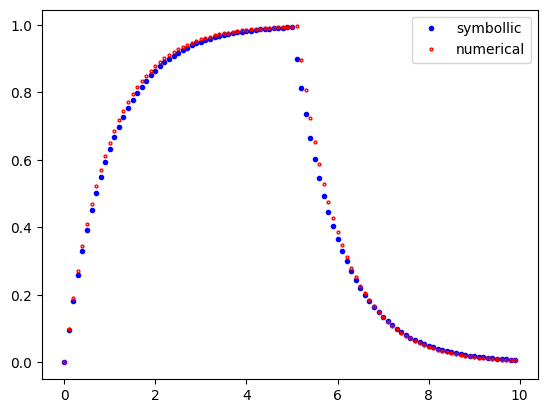

In [21]:
# Write your simulation codes here
dt = 0.1 # step size
y=[0] # arbitrary initial value
t=np.arange(0,10,dt) # timepoint sequence

# iteratively obtain values
for i in t:
    y1=y[-1] # the last element
    
    if i < 5:
        E = 1
    elif i > 5:
        E = 0
        
    y2=y1+dt*(-y1 + E) # Euler integration
    y.append(y2)

t1 = np.arange(0,5,dt) # timepoint sequence
t2 = np.arange(5,10,dt) # timepoint sequence

# true answer
c1 = 0
plot(t1,-np.exp(-t1)+1,'b.', label = 'symbollic')
plot(t2,np.exp(-t2)*(np.exp(5)-1),'b.') # true answer
plot(t,y[0:-1],'ro',markerfacecolor='None', markersize = 2, label = 'numerical') # approximation
legend()

## Please submit the HTML version of your notebook to NTU COOL by 9/12(Mon)!